[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/chain.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58238466-lesson-4-chain)

# Chain

## Review

We built a simple graph with nodes, normal edges, and conditional edges.

## Goals

Now, let's build up to a simple chain that combines 4 [concepts](https://python.langchain.com/v0.2/docs/concepts/):

* Using [chat messages](https://python.langchain.com/v0.2/docs/concepts/#messages) as our graph state
* Using [chat models](https://python.langchain.com/v0.2/docs/concepts/#chat-models) in graph nodes
* [Binding tools](https://python.langchain.com/v0.2/docs/concepts/#tools) to our chat model
* [Executing tool calls](https://python.langchain.com/v0.2/docs/concepts/#functiontool-calling) in graph nodes 

![Screenshot 2024-08-21 at 9.24.03 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dd607b08df5e1101_chain1.png)

In [41]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

## Added my own messages

In [42]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"Hey so what are you upto today", name="ai")]
messages.append(HumanMessage(content=f"nothing much js studying this langchain course bro",name="rishit"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="ai"))
messages.append(HumanMessage(content=f"I want to know what is langchain about basically", name="rishit"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: ai

Hey so what are you upto today
================================ Human Message =================================
Name: rishit

nothing much js studying this langchain course bro
================================== Ai Message ==================================
Name: ai

Great, what would you like to learn about.
================================ Human Message =================================
Name: rishit

I want to know what is langchain about basically


In [43]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

## Passed my messaged to the LLM

In [ ]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(messages)
type(result)

In [ ]:
result.pretty_print()

================================== Ai Message ==================================

LangChain is a framework specifically designed for developing applications that use large language models (LLMs) effectively. It provides the necessary tools and infrastructure to build applications that leverage the power of LLMs for a wide range of use cases.

Key features of LangChain include:

1. **Prompt Management**: LangChain offers tools to create, manage, and optimize the prompts that are used to interact with language models. This is crucial for getting the best results out of LLMs, as the quality of input prompts can significantly affect the outputs.

2. **Chain Management**: The framework allows you to create chains, which are sequences of calls to language models or other utilities. This can help in building more complex applications that require multiple steps of processing or interaction with the model.

3. **Integration with Data**: LangChain facilitates the integration of language models 

In [ ]:
result.response_metadata

{'token_usage': {'completion_tokens': 344,
  'prompt_tokens': 66,
  'total_tokens': 410,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_cbf1785567',
 'id': 'chatcmpl-CRIzY0GSQxmRwTGm7ruBkRX789spq',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

## Added my own set of tools like, addition, subtraction, factorial, division etc and binded them with my llm

In [ ]:

def add(a: int, b: int) -> int:
    """Adds two numbers together."""
    return a + b


def subtract(a: int, b: int) -> int:
    """Subtracts the second number from the first."""
    return a - b


def multiply(a: int, b: int) -> int:
    """Multiplies two numbers together."""
    return a * b


def divide(a: float, b: float) -> float:
    """Divides the first number by the second. Returns an error if division by zero."""
    if b == 0:
        return "Error: Cannot divide by zero."
    return a / b


def factorial(n: int) -> int:
    """Calculates the factorial of a non-negative integer."""
    if n < 0:
        return "Error: Factorial is not defined for negative numbers."
    return math.factorial(n)

llm_with_tools = llm.bind_tools([add, subtract, multiply, divide, factorial])

## Called my tools and printed the tool call using pretty_print()

In [ ]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 7 factorial", name="rishit")])
tool_call.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  factorial (call_iJsnu9MKe0g5zEA1sc0U92s5)
 Call ID: call_iJsnu9MKe0g5zEA1sc0U92s5
  Args:
    n: 7


In [ ]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 5 added to 5", name="rishit")])
tool_call.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  add (call_Lu8yLnkP1wl1mYbuR7poPZrE)
 Call ID: call_Lu8yLnkP1wl1mYbuR7poPZrE
  Args:
    a: 5
    b: 5


In [ ]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 32 minus 7", name="rishit")])
tool_call.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  subtract (call_sQnP4FWGkg9qOD3r0SLuUa2F)
 Call ID: call_sQnP4FWGkg9qOD3r0SLuUa2F
  Args:
    a: 32
    b: 7


In [ ]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 60 divided by 5", name="rishit")])
tool_call.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  divide (call_42UP6dr4uZeNfqkYwqftGKck)
 Call ID: call_42UP6dr4uZeNfqkYwqftGKck
  Args:
    a: 60
    b: 5


In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]

In [ ]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

## Here I have taken a custom example to show how the built-in reducer function appends the messages list and preserves the previous messages instead of just overwriting it 

In [ ]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="Can you give me more details about the ozone layer of the Earth.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure!, Do you want to know about it specifically or want information on how it is being affected by the climate change?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='ca6184f7-fe99-4678-8663-34dde8c8dd43'),
 HumanMessage(content='Can you give me more details about the ozone layer of the Earth.', additional_kwargs={}, response_metadata={}, name='Lance', id='23061cb3-a1f1-4f98-9555-1c6d948ea504'),
 AIMessage(content='Sure!, Do you want to know about it specifically or want information on how it is being affected by the climate change?', additional_kwargs={}, response_metadata={}, name='Model', id='e9d65bba-b688-4f21-b41a-aee9f93fceb2')]

## Created my own graph example:

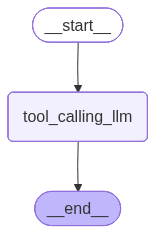

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

## If we write somehting like "yo wassup broski" which doesnt invoke a tool the llm wont use any tools and just reply on the basis of the data on which it has been trained

In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Yo wassup broski")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Yo wassup broski
================================== Ai Message ==================================

Hey! Not much, just here to help you out. What's up with you? Anything you need assistance with?


## The LLM chooses to use a tool when it determines that the input or task requires the functionality provided by that tool.

## Here i have called the factorial tool, which I added, by giving the llm a 10 factorial command

In [ ]:

messages = graph.invoke({"messages": HumanMessage(content="10 Factorial")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

10 Factorial
================================== Ai Message ==================================
Tool Calls:
  factorial (call_VYnbSGuHsWggBLLNgw7eAXuS)
 Call ID: call_VYnbSGuHsWggBLLNgw7eAXuS
  Args:
    n: 10


## Similarly I have called my self defined addition tool here

In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Add 8 and 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 2 and 3
================================== Ai Message ==================================
Tool Calls:
  add (call_sVUItNZSrXB7O1mwJsHW1mTa)
 Call ID: call_sVUItNZSrXB7O1mwJsHW1mTa
  Args:
    a: 2
    b: 3
